In [1]:
%matplotlib inline

In [11]:
from collections import defaultdict

In [17]:
import numpy as np
import pandas as pd

from scipy.stats import gmean

In [47]:
import config
from utils.io import load_pickle, load_image
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode
from utils.scoring import topcoder_metric
from utils.plotting import plot_mask, plot_image_and_mask
from predict import get_prediction_filename

In [32]:
mode = PathologicalImagesDatasetMode.All
base_dir = config.DATASET_TEST_DIR
model_name = 'unet'
nb_folds = 5
patch_size_train = 0
patch_size_predict = 0
use_dice=False

In [33]:
predictions = defaultdict(list)

for fold_number in range(nb_folds):
    predictions_filename = get_prediction_filename(model_name, mode, patch_size_train, patch_size_predict,
                                                   fold_number, use_dice)
    images, fold_predictions = load_pickle(predictions_filename)

    for image, image_pred in zip(images, fold_predictions):
        predictions[image].append(image_pred)

# get geometric mean of all folds
images = sorted(predictions.keys())

In [34]:
predictions_gmean = [gmean(predictions[image]) for image in images]

In [35]:
predictions_mean = [np.mean(predictions[image], axis=0) for image in images]

In [36]:
predictions_mean[0].shape

(500, 500)

In [37]:
len(predictions[image])

5

In [54]:
i = 2

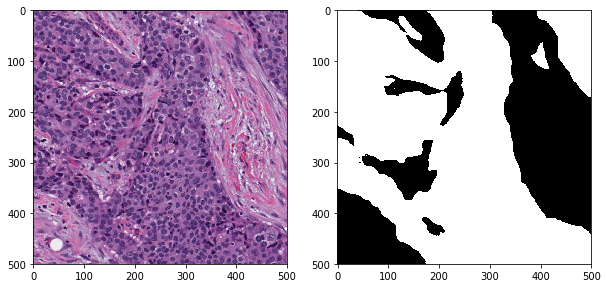

In [55]:
plot_image_and_mask(load_image(images[i]), predictions_gmean[i] > 0.4)

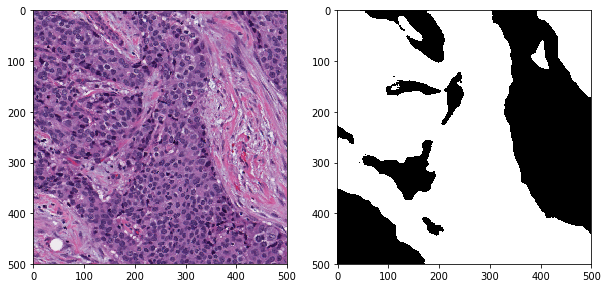

In [56]:
plot_image_and_mask(load_image(images[i]), predictions_mean[i] > 0.4)